In [30]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train images:", x_train.shape)
print("Test images :", x_test.shape)
print("Train labels shape:", y_train.shape)


Train images: (50000, 32, 32, 3)
Test images : (10000, 32, 32, 3)
Train labels shape: (50000, 1)


In [32]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [ ]:
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-6
)


/tmp/ipython-input-930634411.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


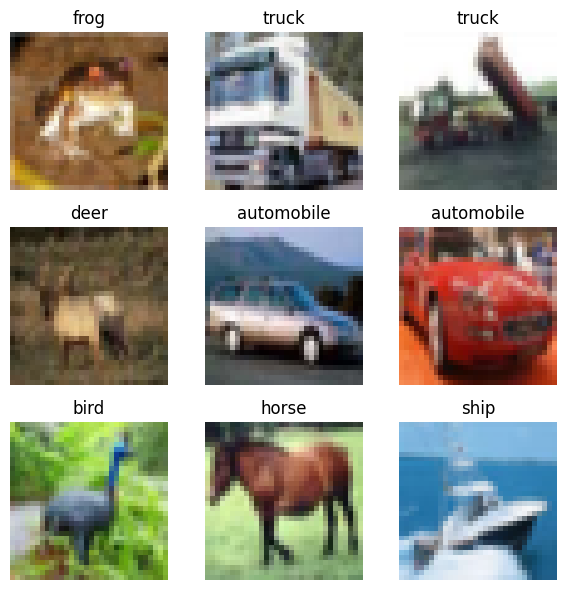

In [33]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()



In [34]:
# Scale pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)


In [35]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)


In [36]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),

    Dense(3000, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1500, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')   # 10 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3000)           │        12,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1500)           │     4,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1500)           │         6,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,753,510 (52.47 MB)

 Trainable params: 13,744,510 (52.43 MB)

 Non-trainable params: 9,000 (35.16 KB)

In [37]:
batch_size = 64
epochs = 20

history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test_cat)
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.2558 - loss: 2.3773 - val_accuracy: 0.3332 - val_loss: 1.9409
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.3246 - loss: 1.9639 - val_accuracy: 0.3676 - val_loss: 1.8057
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3482 - loss: 1.8604 - val_accuracy: 0.3987 - val_loss: 1.7064
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.3689 - loss: 1.7877 - val_accuracy: 0.3806 - val_loss: 1.6927
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.3773 - loss: 1.7638 - val_accuracy: 0.3906 - val_loss: 1.7145
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.3853 - loss: 1.7355 - val_accuracy: 0.4259 - val_loss: 1.6465
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.3978 - loss: 1.6989 - val_accuracy: 0.4140 - val_loss: 1.6869
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.3917 - loss: 1.7026 - val_accurac

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss    : {test_loss:.4f}")


Test Accuracy: 51.00%
Test Loss    : 1.5102


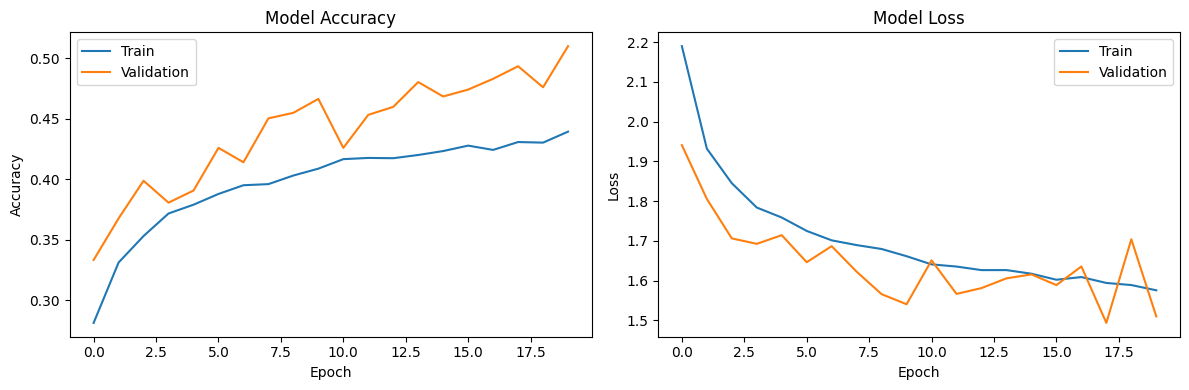

In [41]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


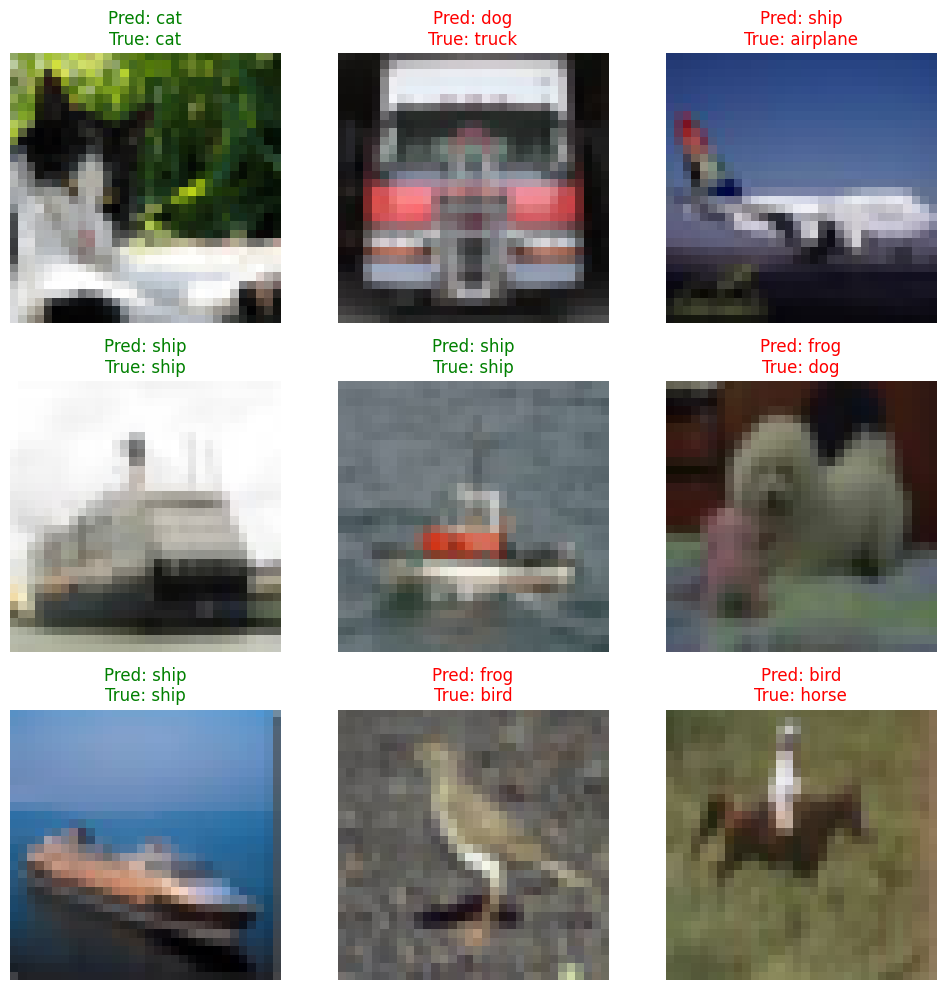

In [42]:
import random

# Get predictions (class indices)
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.reshape(-1)

plt.figure(figsize=(10,10))

for i in range(9):
    idx = random.randint(0, len(x_test)-1)
    img = x_test[idx]

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    pred_label = class_names[y_pred[idx]]
    true_label = class_names[y_true[idx]]

    color = 'green' if y_pred[idx] == y_true[idx] else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
